# Homework 6

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column 'price').

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv).

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('../data/AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log transform to price
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1

In [3]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

* There are no missing values in the data frame

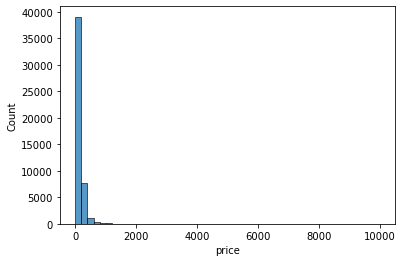

In [5]:
sns.histplot(df["price"], bins=50);

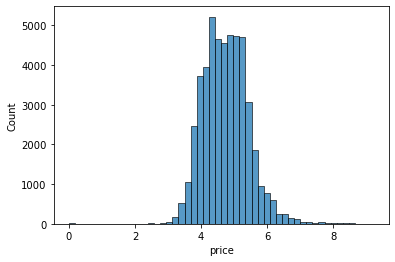

In [6]:
# log transform
df_copy = df.copy()
df_copy["price"] = np.log1p(df_copy["price"])

sns.histplot(df_copy["price"], bins=50);

In [7]:
# train / val / test split
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df_copy, test_size=0.2, shuffle=True, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, shuffle=True, random_state=1)

In [8]:
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [9]:
df_train.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,40.76434,-73.92132,Entire home/apt,4.709530,4,30,0.32,1,363
1,Brooklyn,40.73442,-73.95854,Private room,4.262680,5,2,0.16,1,0
2,Brooklyn,40.66359,-73.99487,Entire home/apt,6.133398,1,33,2.75,5,113
3,Brooklyn,40.63766,-74.02626,Private room,4.605170,3,1,0.12,2,362
4,Brooklyn,40.65118,-74.00842,Private room,7.601402,2,0,0.00,2,365


In [10]:
y_train_full = df_train_full["price"].values
y_train = df_train["price"].values
y_val = df_val["price"].values
y_test = df_test["price"].values

In [11]:
del df_train_full["price"]
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [12]:
df_train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,40.76434,-73.92132,Entire home/apt,4,30,0.32,1,363
1,Brooklyn,40.73442,-73.95854,Private room,5,2,0.16,1,0
2,Brooklyn,40.66359,-73.99487,Entire home/apt,1,33,2.75,5,113
3,Brooklyn,40.63766,-74.02626,Private room,3,1,0.12,2,362
4,Brooklyn,40.65118,-74.00842,Private room,2,0,0.00,2,365


Now, use DictVectorizer to turn train and validation into matrices:

In [13]:
from sklearn.feature_extraction import DictVectorizer

train_full_dicts = df_train_full.to_dict(orient="records")
train_dicts = df_train.to_dict(orient="records")
val_dicts = df_val.to_dict(orient="records")
test_dicts = df_test.to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable.

* Train a model with ```max_depth=1```

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Which feature is used for splitting the data?

* ```room_type```
* ```neighbourhood_group```
* ```number_of_reviews```
* ```reviews_per_month```

In [21]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



**Answer:** ```room_type``` is used fr splitting the data

## Question 2

Train a random forest model with these parameters:

* ```n_estimators=10```
* ```random_state=1```
* ```n_jobs=-1``` (optional - to make training faster)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [26]:
y_pred = rf.predict(X_val)
y_pred

array([4.86757055, 4.80419592, 5.48223437, ..., 5.04008141, 4.662356  ,
       5.35119947])

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_val, y_pred, squared=False)

0.4606935349176549

**Answer:** The closest Answer is 0.459

## Question 3

Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set random_state to 1
* Evaluate the model on the validation dataset

In [30]:
n_estimators = np.arange(10, 201, 10)
n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [32]:
rmse = []
for n in n_estimators:
    print(n)
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse.append(mean_squared_error(y_val, y_pred, squared=False))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


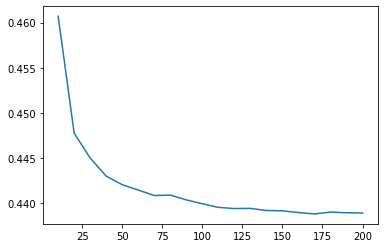

In [33]:
plt.plot(n_estimators, rmse);

After which value of n_estimators does RMSE stop improving?

* 10
* 50
* 70
* 120

**Answer:** 120, it seems to even improve a bit after that.

## Question 4

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
* Fix the random seed: random_state=1

In [43]:
max_depth = [10, 15, 20, 25]

scores = []
for m in max_depth:
    print(f"max_depth: {m}")
    for n in n_estimators:
        print(f"n_estimators: {n}")
        rf = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        scores.append((m, n, mean_squared_error(y_val, y_pred, squared=False)))

max_depth: 10
n_estimators: 10
n_estimators: 20
n_estimators: 30
n_estimators: 40
n_estimators: 50
n_estimators: 60
n_estimators: 70
n_estimators: 80
n_estimators: 90
n_estimators: 100
n_estimators: 110
n_estimators: 120
n_estimators: 130
n_estimators: 140
n_estimators: 150
n_estimators: 160
n_estimators: 170
n_estimators: 180
n_estimators: 190
n_estimators: 200
max_depth: 15
n_estimators: 10
n_estimators: 20
n_estimators: 30
n_estimators: 40
n_estimators: 50
n_estimators: 60
n_estimators: 70
n_estimators: 80
n_estimators: 90
n_estimators: 100
n_estimators: 110
n_estimators: 120
n_estimators: 130
n_estimators: 140
n_estimators: 150
n_estimators: 160
n_estimators: 170
n_estimators: 180
n_estimators: 190
n_estimators: 200
max_depth: 20
n_estimators: 10
n_estimators: 20
n_estimators: 30
n_estimators: 40
n_estimators: 50
n_estimators: 60
n_estimators: 70
n_estimators: 80
n_estimators: 90
n_estimators: 100
n_estimators: 110
n_estimators: 120
n_estimators: 130
n_estimators: 140
n_estimators:

In [44]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimator", "rmse"])
df_scores.head()

,max_depth,n_estimator,rmse
0,10,10,0.445577
1,10,20,0.441929
2,10,30,0.441243
3,10,40,0.441188
4,10,50,0.440825


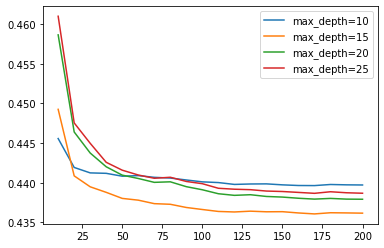

In [45]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimator, df_subset.rmse, label=f"max_depth={d}")
plt.legend();

What's the best max_depth:

* 10
* 15
* 20
* 25

**Answer:** The best value for max_depth is 15.

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

**Answer:** No, the rndomness should not sffect the parameters. If so, the model would be very unstable

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * n_estimators=10,
    * max_depth=20,
    * random_state=1,
    * n_jobs=-1 (optional)
Get the feature importance information from this model

In [47]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

What's the most important feature?

* neighbourhood_group=Manhattan
* room_type=Entire home/apt
* longitude
* latitude

Documentation: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29337 entries, 0 to 29336
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             29337 non-null  object 
 1   latitude                        29337 non-null  float64
 2   longitude                       29337 non-null  float64
 3   room_type                       29337 non-null  object 
 4   minimum_nights                  29337 non-null  int64  
 5   number_of_reviews               29337 non-null  int64  
 6   reviews_per_month               29337 non-null  float64
 7   calculated_host_listings_count  29337 non-null  int64  
 8   availability_365                29337 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.0+ MB


In [79]:
fi = rf.feature_importances_

feature_importances = pd.Series(fi, index=dv.get_feature_names())

feature_importances.sort_values(ascending=False)

/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


room_type=Entire home/apt            0.391899
longitude                            0.154238
latitude                             0.151497
availability_365                     0.077020
minimum_nights                       0.053947
reviews_per_month                    0.052777
number_of_reviews                    0.042841
neighbourhood_group=Manhattan        0.034058
calculated_host_listings_count       0.030181
room_type=Shared room                0.004651
room_type=Private room               0.004441
neighbourhood_group=Queens           0.001178
neighbourhood_group=Brooklyn         0.000909
neighbourhood_group=Bronx            0.000279
neighbourhood_group=Staten Island    0.000083
dtype: float64

**Answer:** The highest feature importance has room_type=Entire home/apt.

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
```

In [80]:
# install XGBoost
!pip install xgboost

In [81]:
import xgboost as xgb

In [82]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [83]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [85]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [86]:
scores = {}

In [84]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  evals=watchlist)

In [87]:
scores['eta=0.3'] = parse_xgb_output(output)

Now change ```eta``` first to ```0.1``` and then to ```0.01```

In [94]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  evals=watchlist)

In [95]:
scores['eta=0.1'] = parse_xgb_output(output)

In [96]:
%%capture output

xgb_params = {
    "eta": 0.01,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  evals=watchlist)

In [97]:
scores['eta=0.01'] = parse_xgb_output(output)

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

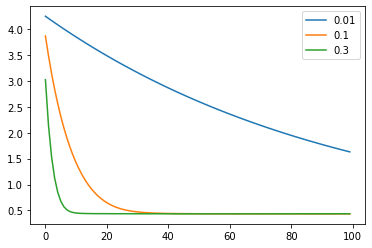

In [99]:
plt.plot(scores['eta=0.01'].num_iter, scores['eta=0.01'].val_auc,
        label='0.01')
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend();

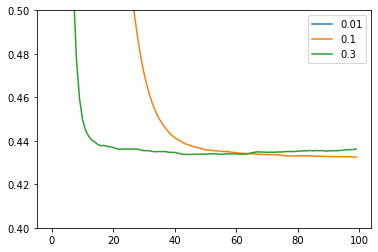

In [101]:
plt.plot(scores['eta=0.01'].num_iter, scores['eta=0.01'].val_auc,
        label='0.01')
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.ylim([0.4,0.5]);

**Answer:** ```eta = 0.1``` gives the lowest rmse.